#### *Problem is*
finding a secret n-bit string by querying an oracle
that takes the dot product of the string with the input.

* classical solution requires n queries.

* Quantumly, we only need one query using the Bernstein-Vazirani algorithm, which
is a polynomial speedup over classical computers.

first lets look at a simple example and later  we will generalize it

In [48]:
import qiskit
from qiskit import*
from qiskit.visualization import*
%matplotlib inline
from matplotlib import style
style.use('dark_background')


In [49]:
secret_number = '100011' # 6 bit input

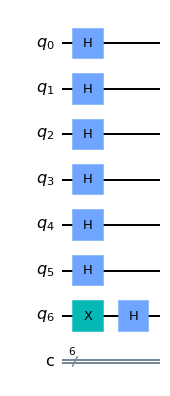

In [50]:
circuit= QuantumCircuit(6+1,6) # 6 inputs + 1 target qubit
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.draw('mpl')

In [51]:
circuit.barrier()

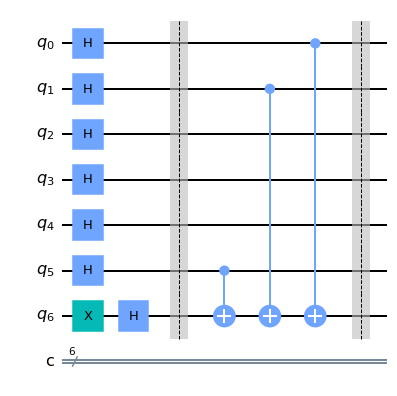

In [52]:
# lets now create the oracle (CNOTs on all 1s to target qubit)

circuit.cx(5,6)
circuit.cx(1,6)
circuit.cx(0,6)
circuit.barrier()
circuit.draw('mpl')



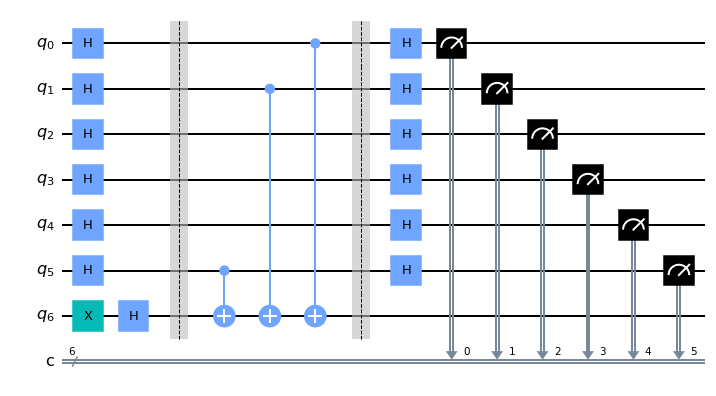

In [53]:
# now the last part of the algorithm
circuit.h([0,1,2,3,4,5])
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw('mpl')

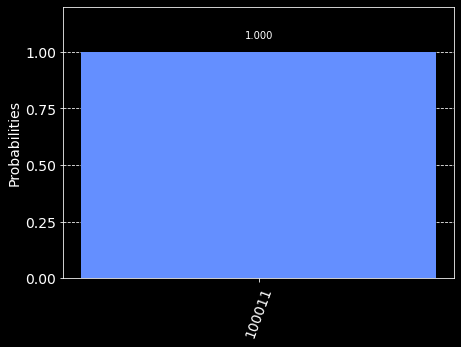

In [54]:
# lets check the result
simulator = Aer.get_backend('aer_simulator')
result = execute(circuit,backend=simulator,shots=1).result()
counts = result.get_counts()
plot_histogram(counts)

##### **Wow....! we made it**
so its time to generalise

Enter your secert number in Binary101010001
     ┌───┐      ░                      ░ ┌───┐┌─┐                        
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├┤M├────────────────────────
     ├───┤      ░   │                  ░ ├───┤└╥┘┌─┐                     
q_1: ┤ H ├──────░───┼──────────────────░─┤ H ├─╫─┤M├─────────────────────
     ├───┤      ░   │                  ░ ├───┤ ║ └╥┘┌─┐                  
q_2: ┤ H ├──────░───┼──────────────────░─┤ H ├─╫──╫─┤M├──────────────────
     ├───┤      ░   │                  ░ ├───┤ ║  ║ └╥┘┌─┐               
q_3: ┤ H ├──────░───┼──────────────────░─┤ H ├─╫──╫──╫─┤M├───────────────
     ├───┤      ░   │                  ░ ├───┤ ║  ║  ║ └╥┘┌─┐            
q_4: ┤ H ├──────░───┼────■─────────────░─┤ H ├─╫──╫──╫──╫─┤M├────────────
     ├───┤      ░   │    │             ░ ├───┤ ║  ║  ║  ║ └╥┘┌─┐         
q_5: ┤ H ├──────░───┼────┼─────────────░─┤ H ├─╫──╫──╫──╫──╫─┤M├─────────
     ├───┤      ░   │    │             ░ ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐ 

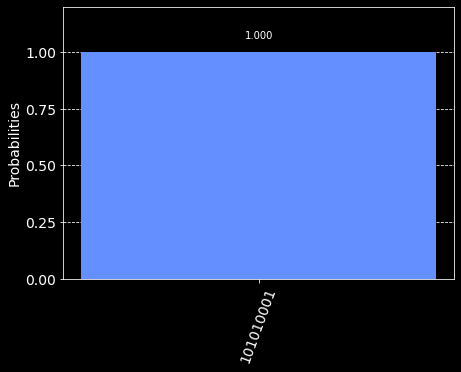

In [56]:
secret_number = input('Enter your secert number in Binary')
circuit= QuantumCircuit(len(secret_number)+1,len(secret_number)) # 6 inputs + 1 target qubit
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()

# our oracle is created as;
for index, digit in enumerate(reversed(secret_number)):
    if digit == '1':
        circuit.cx(index, len(secret_number))

circuit.barrier()
circuit.h(range(len(secret_number)))
circuit.measure(range(len(secret_number)),range(len(secret_number)))
print(circuit.draw())

# lets check the result
simulator = Aer.get_backend('aer_simulator')
result = execute(circuit,backend=simulator,shots=1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### *Once again we explored the computational power of a Quantum computer*